In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('all.csv')
df

,Unnamed: 0,_start,_stop,_time,Area,ErrorCode,FunctionalUnit,Geohash,Line,Measurement,...,SystemIndex,ToolPosition,TypeID,WPC,WorkPosition,_measurement,Angle,PartID,TestID,Torque
0,0,1701262800000,1701266399999,1701263293436,99,0,2,ezjqj2by2,4104,WireCutting,...,1,1,1134240024,Def WPC,300,WireCutting,"[{""Name"":""Angle"",""Fields"":[{""Name"":""timestamp""...",113424002437929411236351,2023-11-29T13:08:10Z,"[{""Name"":""Torque"",""Fields"":[{""Name"":""timestamp..."
1,1,1701262800000,1701266399999,1701263311643,99,0,2,ezjqj2by2,4104,WireCutting,...,1,1,1134240024,Def WPC,300,WireCutting,"[{""Name"":""Angle"",""Fields"":[{""Name"":""timestamp""...",113424002437929411243331,2023-11-29T13:08:28Z,"[{""Name"":""Torque"",""Fields"":[{""Name"":""timestamp..."
2,2,1701262800000,1701266399999,1701263345644,99,0,2,ezjqj2by2,4104,WireCutting,...,1,1,1134240024,Def WPC,300,WireCutting,"[{""Name"":""Angle"",""Fields"":[{""Name"":""timestamp""...",113424002437929411244121,2023-11-29T13:09:02Z,"[{""Name"":""Torque"",""Fields"":[{""Name"":""timestamp..."
3,3,1701262800000,1701266399999,1701263367394,99,0,2,ezjqj2by2,4104,WireCutting,...,1,1,1134240024,Def WPC,300,WireCutting,"[{""Name"":""Angle"",""Fields"":[{""Name"":""timestamp""...",113424002437929411245121,2023-11-29T13:09:24Z,"[{""Name"":""Torque"",""Fields"":[{""Name"":""timestamp..."
4,4,1701262800000,1701266399999,1701263387177,99,0,2,ezjqj2by2,4104,WireCutting,...,1,1,1134240024,Def WPC,300,WireCutting,"[{""Name"":""Angle"",""Fields"":[{""Name"":""timestamp""...",113424002437929411246271,2023-11-29T13:09:44Z,"[{""Name"":""Torque"",""Fields"":[{""Name"":""timestamp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44969,76,1701057600000,1701061199999,1701060352429,99,0,2,ezjqj2by2,4104,WireCutting,...,1,1,1134240024,Def WPC,300,WireCutting,"[{""Name"":""Angle"",""Fields"":[{""Name"":""timestamp""...",113424002437927410431031,2023-11-27T04:45:49Z,"[{""Name"":""Torque"",""Fields"":[{""Name"":""timestamp..."
44970,77,1701057600000,1701061199999,1701060370477,99,0,2,ezjqj2by2,4104,WireCutting,...,1,1,1134240024,Def WPC,300,WireCutting,"[{""Name"":""Angle"",""Fields"":[{""Name"":""timestamp""...",113424002437927410430461,2023-11-27T04:46:07Z,"[{""Name"":""Torque"",""Fields"":[{""Name"":""timestamp..."
44971,78,1701057600000,1701061199999,1701060389520,99,0,2,ezjqj2by2,4104,WireCutting,...,1,1,1134240024,Def WPC,300,WireCutting,"[{""Name"":""Angle"",""Fields"":[{""Name"":""timestamp""...",113424002437927410431541,2023-11-27T04:46:26Z,"[{""Name"":""Torque"",""Fields"":[{""Name"":""timestamp..."
44972,79,1701057600000,1701061199999,1701060415105,99,0,2,ezjqj2by2,4104,WireCutting,...,1,1,1134240024,Def WPC,300,WireCutting,"[{""Name"":""Angle"",""Fields"":[{""Name"":""timestamp""...",113424002437927410431271,2023-11-27T04:46:52Z,"[{""Name"":""Torque"",""Fields"":[{""Name"":""timestamp..."


In [3]:
import json

# Preallocate list to store results
results = []

# Extract torque and angle outside the loop
torque_data = df["Torque"].apply(json.loads)
angle_data = df["Angle"].apply(json.loads)

for sample in range(0, 40000):
    torque = pd.DataFrame(torque_data[sample][0]['Rows'], columns=["Time", "Torque"])
    angle = pd.DataFrame(angle_data[sample][0]['Rows'], columns=["Time", "Angle"])

    total_data = pd.concat([angle, torque], axis=1)

    total_data['Kleiner_als_vorher'] = total_data["Angle"] > total_data["Angle"].shift(1)
    total_data['Kumulatives_Produkt'] = (total_data['Kleiner_als_vorher'][1:].astype(int)).cumprod()

    resultat = total_data[total_data['Kumulatives_Produkt'] == 1]
    resultat2 = total_data[total_data['Kumulatives_Produkt'] == 0]

    mean_torque_1 = np.mean(resultat['Torque'])
    mean_torque_2 = np.mean(resultat2['Torque'])
    std_torque_1 = np.std(resultat['Torque'])
    std_torque_2 = np.std(resultat2['Torque'])

    results.append([sample, mean_torque_1, mean_torque_2, std_torque_1, std_torque_2])

# Create DataFrame from results
da = pd.DataFrame(results, columns=["Sample", "Mean first rotation", "Mean second rotation", "Standard deviation first rotation", "Standard deviation second rotation"])


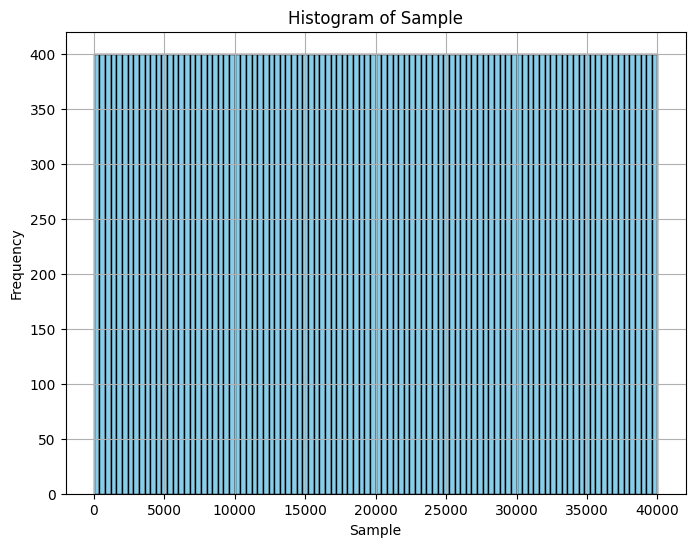

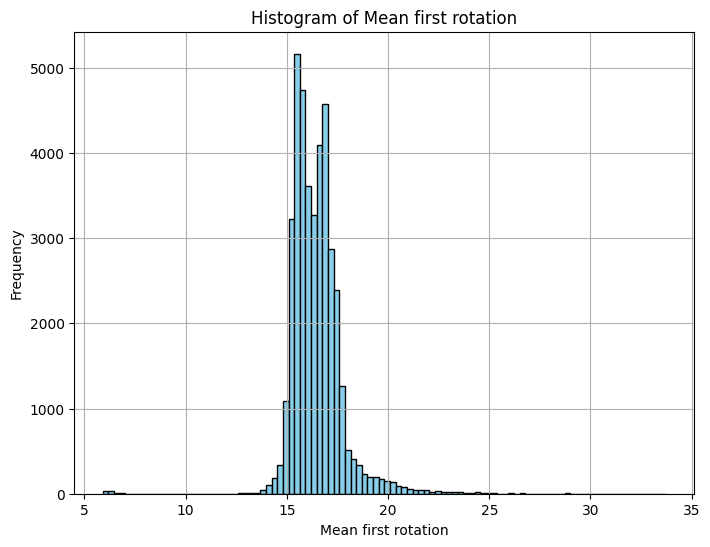

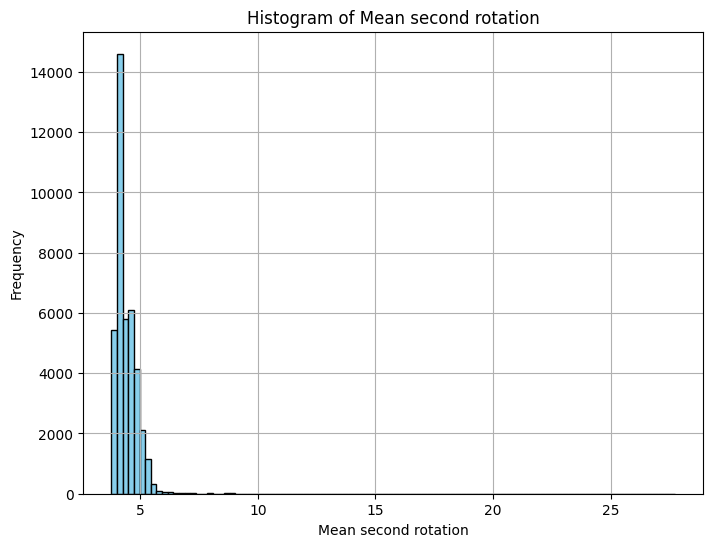

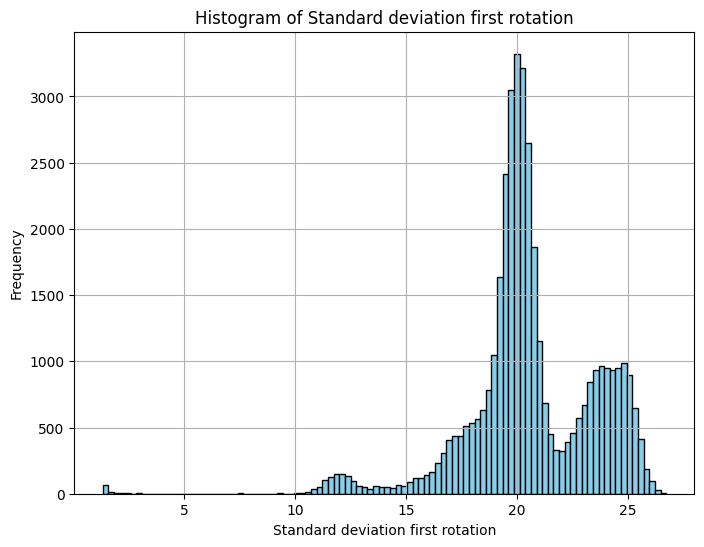

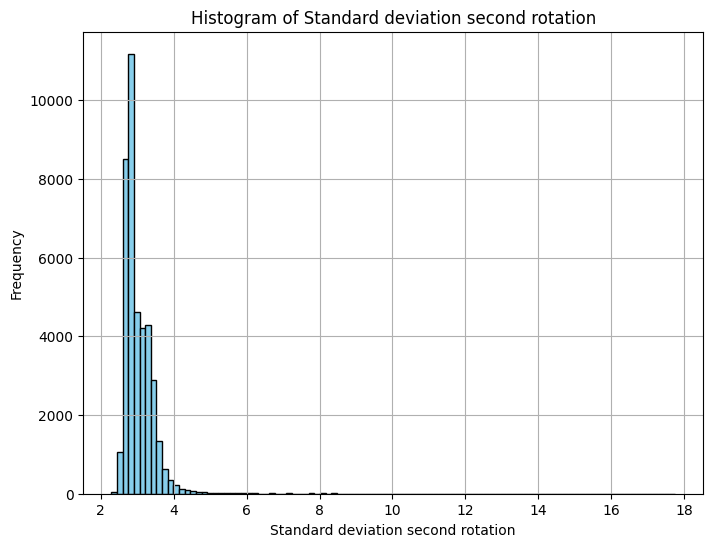

In [4]:
import matplotlib.pyplot as plt

# Plot histograms for each column
for col in da.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(da[col], bins=100, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

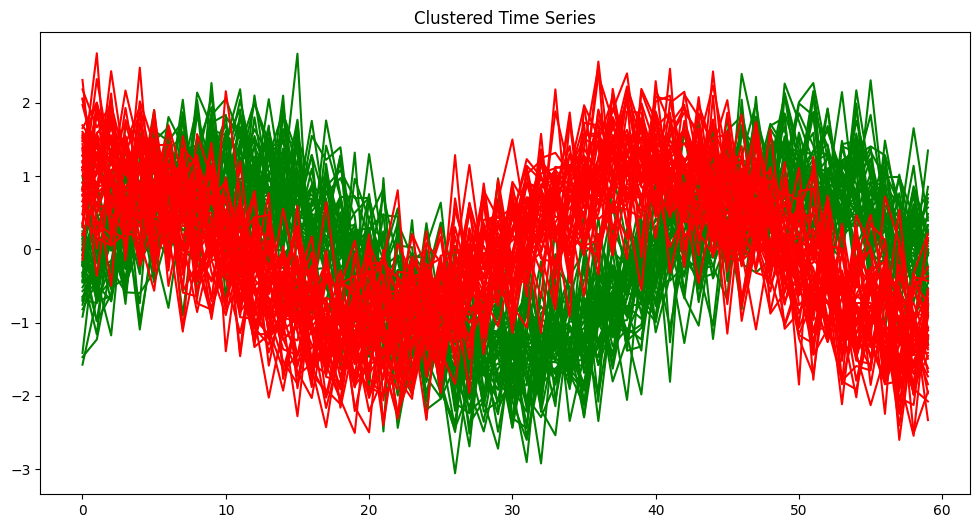

In [16]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
n_series = 100
length = 60
data = np.array([np.sin(np.linspace(0, 3*np.pi, length)) + np.random.normal(scale=0.5, size=length) for _ in range(n_series//2)])
data = np.append(data, np.array([np.cos(np.linspace(0, 3*np.pi, length)) + np.random.normal(scale=0.5, size=length) for _ in range(n_series//2)]), axis=0)

# Normalize the data
data_normalized = (data - np.mean(data, axis=1).reshape(-1, 1)) / np.std(data, axis=1).reshape(-1, 1)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

# Plotting the results
plt.figure(figsize=(12, 6))
colors = ['r', 'g']
for i, series in enumerate(data_normalized):
    plt.plot(series, color=colors[clusters[i]])
plt.title('Clustered Time Series')
plt.show()


In [18]:
np.shape(data)

(100, 60)

In [85]:
torque_array=[]
separate_rotation=[]

for sample in range(0, 400):
    torque = pd.DataFrame(torque_data[sample][0]['Rows'], columns=["Time", "Torque"])
    torque=torque.drop(columns=["Time"])
    angle = pd.DataFrame(angle_data[sample][0]['Rows'], columns=["Time", "Angle"])

    total_data = pd.concat([angle, torque], axis=1)
    total_data['Kleiner_als_vorher'] = total_data["Angle"] > total_data["Angle"].shift(1)
    total_data['Kumulatives_Produkt'] = (total_data['Kleiner_als_vorher'][1:].astype(int)).cumprod()

    resultat = total_data[total_data['Kumulatives_Produkt'] == 1]
    resultat2 = total_data[total_data['Kumulatives_Produkt'] == 0]
    resultat2=resultat2.reset_index()

    resultat=resultat.drop(columns=["Time","Angle",'Kleiner_als_vorher',"Kumulatives_Produkt"])
    resultat2=resultat2.drop(columns=["Time","index","Angle",'Kleiner_als_vorher',"Kumulatives_Produkt"])

     # Ensure both dataframes have the same shape by truncating or padding
    max_len = 836  # Define the target length
    resultat = resultat.head(max_len).reindex(range(max_len), fill_value=0)
    resultat2 = resultat2.head(max_len).reindex(range(max_len), fill_value=0)


    separate_rotation.append(resultat)
    separate_rotation.append(resultat2)

    torque_array.append(torque)

In [81]:
separate_rotation

[     Torque
 0       NaN
 1       6.3
 2       7.6
 3       6.1
 4       7.0
 ..      ...
 831   -17.2
 832   -17.2
 833   -17.2
 834   -17.2
 835   -17.2
 
 [836 rows x 1 columns],
      Torque
 0     -19.2
 1       0.2
 2      13.0
 3      17.4
 4      28.1
 ..      ...
 831    -2.0
 832    -1.9
 833    -1.9
 834    -2.4
 835    -2.1
 
 [836 rows x 1 columns],
      Torque
 0       NaN
 1       6.6
 2       6.3
 3       6.4
 4       7.0
 ..      ...
 831   -19.3
 832   -19.3
 833   -19.3
 834   -19.3
 835   -19.3
 
 [836 rows x 1 columns],
      Torque
 0     -19.3
 1       8.2
 2       9.2
 3      10.6
 4      13.3
 ..      ...
 831    -1.2
 832    -1.8
 833    -1.5
 834    -2.0
 835    -1.8
 
 [836 rows x 1 columns],
      Torque
 0       NaN
 1       7.2
 2       6.9
 3       6.5
 4       7.1
 ..      ...
 831    -4.5
 832    -4.5
 833    -4.5
 834    -4.5
 835    -4.5
 
 [836 rows x 1 columns],
      Torque
 0     -11.3
 1     -13.3
 2       3.2
 3       9.0
 4      13.2
 ..    

In [82]:
np.shape(np.array(separate_rotation))

(800, 836, 1)

In [86]:
data2=np.array(separate_rotation)
squeezed_arr2 = np.squeeze(data2)

In [27]:
data=np.array(torque_array)
squeezed_arr = np.squeeze(data)
np.shape(squeezed_arr)

(400, 1668)

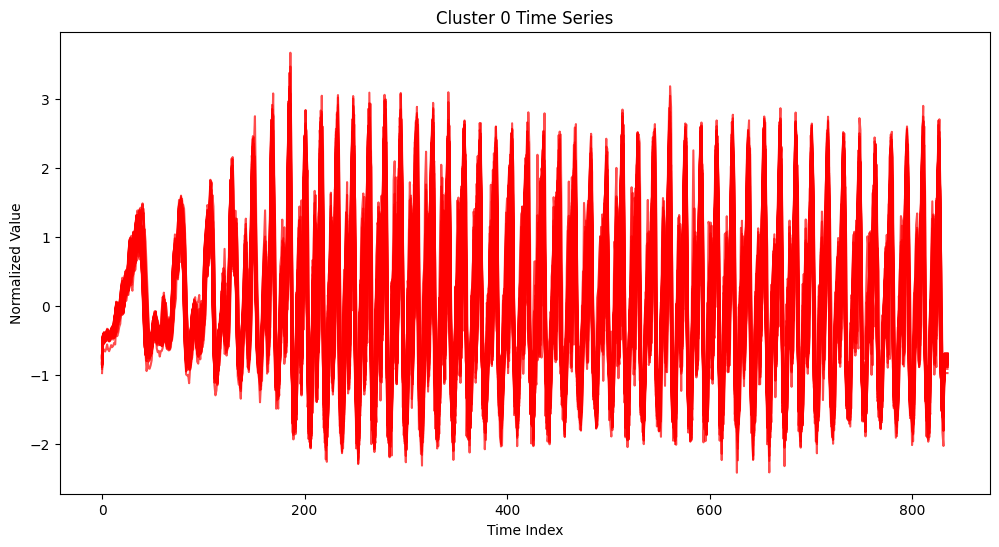

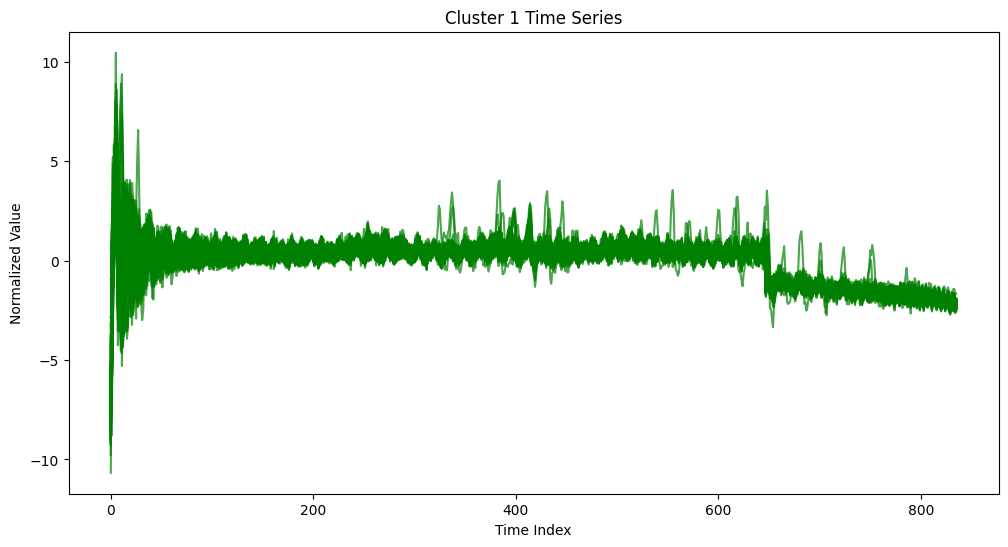

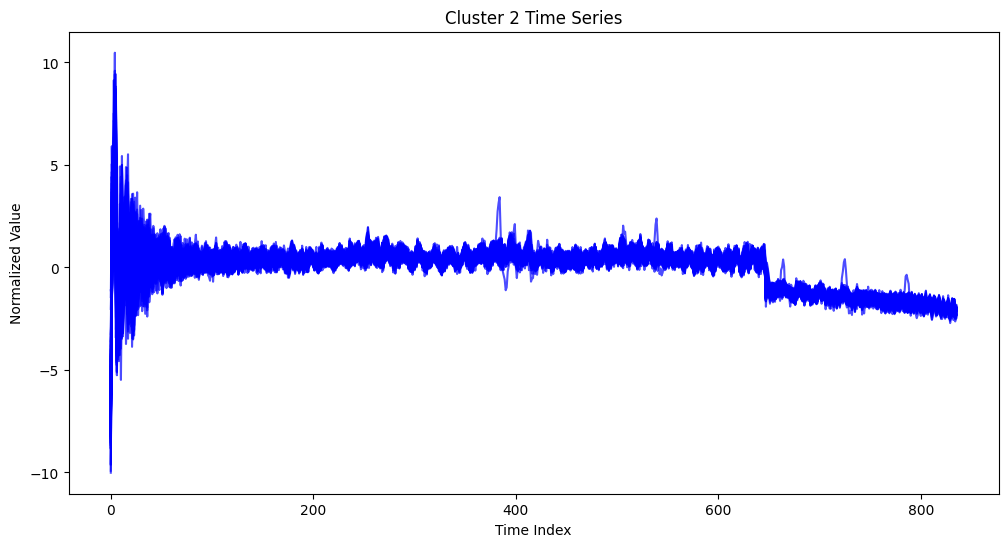

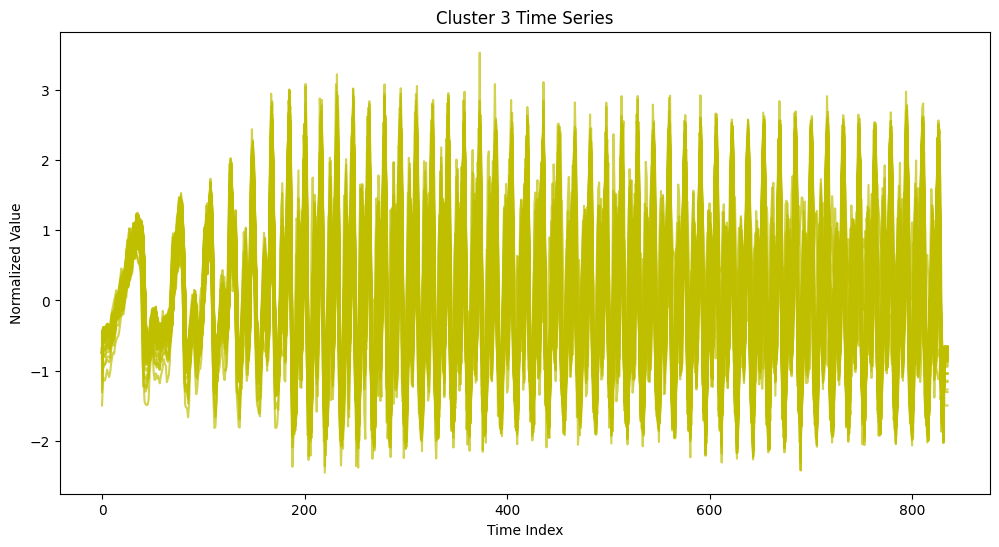

In [87]:
data=squeezed_arr2

# Normalize the data
data_normalized = (data - np.mean(data, axis=1).reshape(-1, 1)) / np.std(data, axis=1).reshape(-1, 1)

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

colors = ['r', 'g', 'b', 'y', 'm', 'c'] 
unique_clusters = np.unique(clusters)
# Plot each cluster in a separate figure
for cluster_id in unique_clusters:
    plt.figure(figsize=(12, 6))  # Create a new figure for each cluster
    for i, series in enumerate(data_normalized):
        if clusters[i] == cluster_id:
            # Plot all series of this cluster on the same plot
            plt.plot(series, color=colors[cluster_id % len(colors)], alpha=0.7)  # Use alpha for better visibility of overlapping series
    plt.title(f'Cluster {cluster_id} Time Series')
    plt.xlabel('Time Index')
    plt.ylabel('Normalized Value')
    plt.show()